## Homework 1 - Supervised Learning

## Problem 1: Set up Github and clone assignment repo. 

**REMINDER ON HOW TO SUBMIT:**


- Go to http://www.github.com and create an account.
- Fill out this spreadsheet with your Github username and Columbia UNI https://docs.google.com/spreadsheets/d/1KEBDe8H0x_drnqx4ZeMyMUN-6-LrDVy2tBBJ97RZtMY/edit?usp=sharing

- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. **Make sure to install command line tools. **
- Click on this link: https://classroom.github.com/a/Xk990Gdv
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/apmae4990-hw-project-{your-git-username}```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!). **This is where you will store all of your homework and your final project. **


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ cd apmae4990-hw-project-{your-git-username} ```

``` $ git add myhomeworksolutions.ipynb ``` ( this adds your homework to the files to be pushed )

``` $ git status ``` ( this shows which files have been modified and will be part of the commit)

``` $ git commit -m "added my homework 1 solutions" ``` (commits the files for the push to the repo)

``` $ git push origin master $ ``` (pushes the files to the repo)

**Writing to the notebook:** To write code in this notebook, you can create a new cell directly below the problem. Either click `Insert -> Insert Cell Below` or type `CTRL-M` **then** `B`.


### Very important!!

Do not expect to understand every single import statement or piece of code when you first start. You should always think about what your goal is, and try to figure out how to do it yourself. However in many cases it is much easier to simply search stack overflow for the *right* way to do something. You are free to do this and do not need to include any references. This is largely how engineers and data scientists discover things in practice when they are unfamiliar with a topic. 


## Problem 2: Sales Data Analysis

In this problem we will explore our first dataset using `pandas` (for loading and procssing our data) and `sklearn` (for building machine learning models).

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random

%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features (variables, covariates, all mean the same thing)?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper
- **Sales:** Number of 1k units sold. 

**Goal:** Predict the amount of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the variable ranges.

**[5 points]** Use df.boxplot()

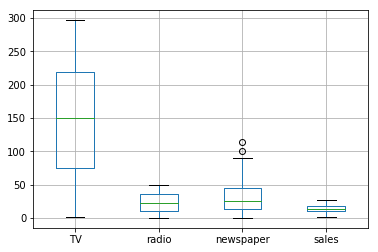

In [2]:
df.boxplot(column=['TV', 'radio', 'newspaper', 'sales'])

### Problem 2, Part 1: Create scatter plots using `pandas.plotting.scatter_matrix`

**[5 points]** Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. 

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000005DEA77FD0>,
      dtype=object)

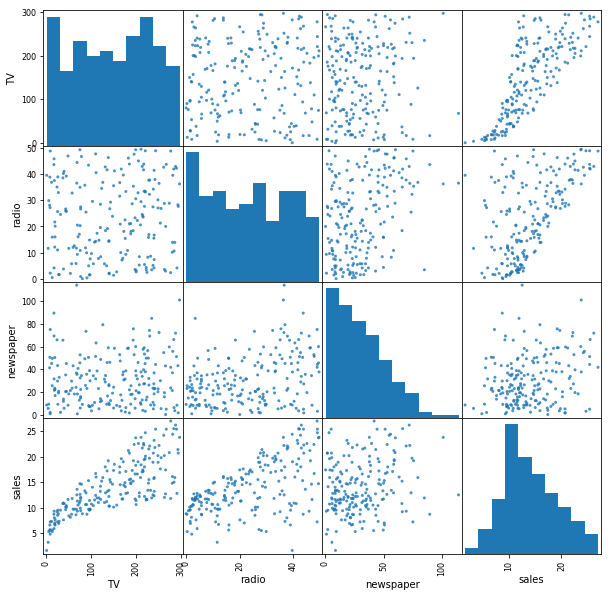

In [3]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, alpha = 0.8, figsize = (10,10))

Which of the variables seem correlated with one another? Which don't? Explain your answer.

**[Solution]:** TV, Newspaper and Radio are correlated with sales; Newspaper has some correlation with Radio, but TV is not! 

Why might these variables be correlated in intuitive terms?

**[Solution]:** Intuitively, TV, Newspaper and Radio are very common media solutions to increase conversion rate so that improve sales. The correlation between radio and newspaper. However, Newspaper has some correlation with Radio because they both covers most same infomation, and either has time and space basis. Lastly, they both have less cost than TV. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

**Note:** This example does not randomize the test/train split. So please ensure you've done this using `test_train_split`. 

In [4]:
from sklearn.linear_model import LinearRegression

**[2 points]** a) Set y to be the sales in df

In [5]:
df_Y = df['sales']

**[2 points]** b) Set X to be just the features described above in df. Because we need to add an intercept in, also create a new column called `interecept` which is just 1. 

In [6]:
intercept = pd.Series(np.ones(df.shape[0]), name = "interecept", index = np.arange(1,201))

df_X = pd.concat([intercept, df.loc[:, 'TV':'newspaper']], axis=1)
df_X.head()

,interecept,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


**[5 points]** c) Randomly split data into training and testing - 80% training, 20% testing. Make sure your test/train split is random. 

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=4751)

**[5 points]** d) Train model on training data, and make predictions on testing data, using our solution from class

$$ \beta = (X^TX)^{-1}X^Ty.$$

It will be useful to use `np.linalg.inverse`. 

In [8]:
beta = np.linalg.inv((df_X_train.T).dot(df_X_train)).dot(df_X_train.T).dot(df_Y_train)
beta.round(6)

array([ 2.850967,  0.045332,  0.202511, -0.008094])

**[5 points]** d) Train model on training data, and make predictions on testing data, using `sklearn.linear_model.LinearRegression`. Make sure your answer matches part d).

In [9]:
# Create linear regression object
regr = LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(df_X_train, df_Y_train)
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 2.85096669  0.04533182  0.20251139 -0.00809425]


**[5 points]** e) Evalute the R^2 on training data and testing data. Is this good? Bad? Why?

In [10]:
from sklearn.metrics import r2_score

# Make predictions using the testing set
df_Y_fit = regr.predict(df_X_train)
df_Y_pred = regr.predict(df_X_test)

# Explained model performance by R^2
print('R^2 score in training: %.2f' % r2_score(df_Y_train, df_Y_fit))
print('R^2 score in testing: %.2f' % r2_score(df_Y_test, df_Y_pred))

R^2 score in training: 0.91
R^2 score in testing: 0.85


**[Solution]:**
The $R^2$ is equal to 0.9, which is very good because the model has explained 90% variance in the data.

**[5 points]** g) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a *good* model?

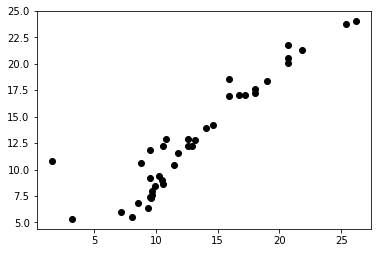

In [11]:
plt.scatter(df_Y_test, df_Y_pred, color = 'black')

**[Solution]:** Based on the plot above, it clearly shows the linear association between predited values and true values.

**[5 points]** f) Interpreting the coefficients of your model (`clf.coef_1`), which form of advertising appears to have the largest impact on sales? Which has the least impact?

**[Solution]:**

The largest impact on sales is radio that every $1 spend on radio, fixed other features, we expect sales are increasing 180 dollars.

The least impact on sales is newspaper that every $1 spend on newspaper, fixed other features, we expect sales have no change.

**[10 points]** g) Plot the coefficients along with their confidence intervals, recalling that 

$$\beta \sim \mathcal{N}(\hat \beta, \hat \sigma^2(X^TX)^{-1}).$$

The variance of the coefficients are the diagonal elemements of the covariance matrix $\sigma^2(X^TX)^{-1}$, where $\hat \sigma$ is the estimated residuals. 

Ensure you obtain the same results for the variance of the coefficients as when you use:

In [12]:
import scipy, scipy.stats
import statsmodels.api as sm

results = sm.OLS(df_Y, df_X).fit()
print(results.summary())

CI = results.conf_int()
CI.columns = [0.025, 0.95]
CI

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        14:53:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
interecept     2.9389      0.312      9.422      0.0

,0.025,0.95
interecept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


**[10 points]** h) Repeat the steps above but **build a seperate model for each individual feature**, ie. `X = df[col]` where `col` is one of the variables TV, radio and newspaper. Based on this analysis, which feature now appears to have more of an influence on sales? Which has practically none? Provide an interpretation of this apparent contradiction. 

**Hint:** It may be useful to check the correlation matrix using `df.corr()` and to understand how the covariates relate to one another. 

In [13]:
for i in ['TV', 'radio', 'newspaper']:
    print("Sales regression on {}". format(i))
    results = sm.OLS(df_Y, df_X.loc[:, ['interecept',i]]).fit()
    print(results.summary())
    
df.corr()

Sales regression on TV
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.47e-42
Time:                        14:57:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
interecept     7.0326      0.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**[Solution]:**
Based on the summary table, the radio has the highest impact on sales, and TV is the least impact on sales. The high correlation between newspaper and radio causes contradiction happens. 

**[10 points]** i) (synnergetic effects) Try plotting the data in three dimensions along with the hyperplane solution to see where the solution you have stops following the linear trend, and see if you can infer
a new variable which will help, which is a product of two of our current variables.  More precisely, our previous model has been:

$$ y = \beta_0 x_{0} +  \beta_0 x_{1} +  \beta_0 x_{2} + \epsilon.$$

See if you an introduce a new term $$ \beta_{ij} x_i x_j$$ for some j using your intuition from the previous problems.

What is your interpretation of this result?

** Hint: The code below can be adopted to make your 3d plot.**

Text(0.5,0.92,'Added Interaction')

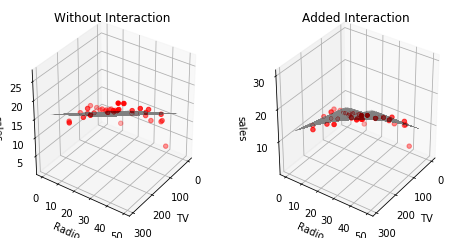

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Added Interaction term
interaction_train = pd.DataFrame(df_X_train.loc[:,'radio'] * df_X_train.loc[:,'TV'], columns = ['radio.TV'])
interaction_test = pd.DataFrame(df_X_test.loc[:,'radio'] * df_X_test.loc[:,'TV'], columns = ['radio.TV'])

df_X_train2 = pd.concat([df_X_train, interaction_train], axis=1)
df_X_test2 = pd.concat([df_X_test, interaction_test], axis=1)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

x_surf = df_X_train.loc[:, 'TV']
y_surf = df_X_train.loc[:, 'radio']
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})

# define your regr_1
regr_1 = LinearRegression()

# Train the model using the training sets
regr_1.fit(df_X_train.loc[:, ['TV','radio']], df_Y_train)

predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='white',
                alpha = 0.002)
ax.view_init(32, 35)

ax.scatter(df_X_test['TV'], df_X_test['radio'], df_Y_test, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')
ax.set_title('Without Interaction')

ax = fig.add_subplot(1, 2, 2, projection='3d')

x_surf = df_X_train2.loc[:, 'TV']
y_surf = df_X_train2.loc[:, 'radio']
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
xy_surf = x_surf * y_surf

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel(), 'radio.TV':xy_surf.ravel()})

# define your regr_1
regr_1 = LinearRegression()


# Train the model using the training sets
regr_1.fit(df_X_train2.loc[:, ['TV','radio', 'radio.TV']], df_Y_train)

predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='white',
                alpha = 0.002)
ax.view_init(32, 35)

ax.scatter(df_X_test2['TV'], df_X_test2['radio'], df_Y_test, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')
ax.set_title('Added Interaction')

**[Solution]:** If I trained the model without interaction, from left plot, I can see there is a hyperplan to separate the points, but it exists underfitting. On the other hand, after I added interaction `Radio` and `TV`, the surface is fitting data much better, which means the interaction increases the model complexity, and enhances the model efficiency to learn the pattern from high dimension.

**[5 points]** h) Does your mixed variable in i) imporve performance? Why?

In [15]:
# define your regr_1
regr_2 = LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr_2.fit(df_X_train2, df_Y_train)

# Make predictions using the testing set
df_Y_fit = regr_2.predict(df_X_train2)
df_Y_pred = regr_2.predict(df_X_test2)

# Explained model performance by R^2
print('R^2 score in training: %.4f' % r2_score(df_Y_train, df_Y_fit))
print('R^2 score in testing: %.4f' % r2_score(df_Y_test, df_Y_pred))

R^2 score in training: 0.9761
R^2 score in testing: 0.9346


 **[Solution]:** Added the interaction term `TV * Radio`, and the model performance has been improved by 8% in the testing set. 

Let $$ F_{\alpha}^p(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}^{(i)})^2 + \alpha \|\beta\|_{L^p}^p.$$

We call $F_{\alpha}^p$ to be the *Lasso* norm when $p=1$ and *Ridge* norm when $p=2$. 

**[5 points]** a) First rescale you features to have mean zero and unit variance using

In [15]:
from sklearn import preprocessing

x_scaled_train = pd.DataFrame(preprocessing.scale(df_X_train.loc[:,'TV':]))
y_scaled_train = pd.DataFrame(df_Y_train - np.mean(df_Y_train))

x_scaled_test = pd.DataFrame(preprocessing.scale(df_X_test.loc[:,'TV':]))
y_scaled_test = pd.DataFrame(df_Y_test - np.mean(df_Y_test))

**[5 points]** a) Repeat the regression above, but using `sklearn`'s `Lasso()` method with $\alpha=0$ on the new scaled features. Notice you may obtain a warning. Can you explain what the warning about convergence of the gradient descent method may mean?

In [17]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0)

clf.fit(x_scaled_train,y_scaled_train)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
E:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

**[Solution]:** It is saying that the gradient descent did not converge so that `Lasso` did not find a unique solution



**[10 points]** b) Choose a range of $\alpha$ ranging from 0 to 1. Why does the $R^2$ score on test data seem to increase then decrease again?
Plot the $R^2$ on test data as you vary $\alpha$. 

**Note:** Because of the randomness, you may need to experiment a bit with replacing 1 by smaller or lower numbers. The goal is to find a concave region. Also, to create a collection of  uniformly distributed points from 0 to 1, you can use:


Text(0.5,1,'R^2 for Lasso model')

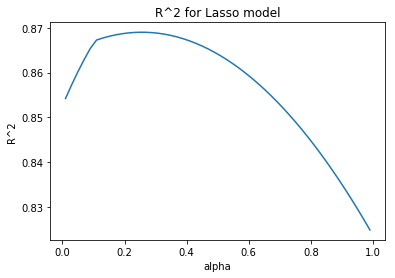

In [34]:
alphas = np.linspace(0.01,0.99,50)
R2 = np.array([])
beta = np.array([])

for i in alphas:
    clf = Lasso(alpha=i)
    clf.fit(x_scaled_train,y_scaled_train)
    beta = np.append(beta, clf.coef_)
    
    y_pred = clf.predict(x_scaled_test)
    R2 = np.append(R2, r2_score(y_scaled_test, y_pred))
    
plt.plot(alphas, R2)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('R^2 for Lasso model')

**[Solution]:** `Alpha` is controling the how heavy penerality should put on the model. Based on the plot, when `Alpha = 0.25`, `Lasso` model has droped some useless variables so that the model is reaching the highest performance. However, when `Alpha` is getting larger, heavier penerality applied on the model, so it auses less variables left in the model. Therefore, the model performance is decreasing. 

**[10 points]** c) Choose the *best* $\alpha$ from part b) (you can use `alphas[np.argmax(scores)]`). What is your new score on test data? (it may not change much) What are the coefficients for this model and how do they compare as $\alpha$ ranges from close to $0$ to larger values?

The best alpha in the validation: 0.25
The new score on test data when alpha = 0.25:  0.869


Text(0,0.5,'Beta2')

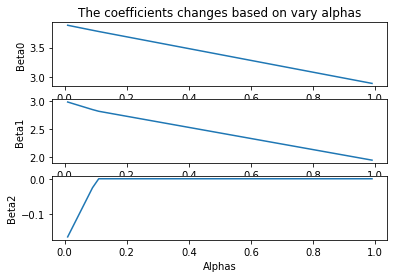

In [29]:
print('The best alpha in the validation:', alphas[np.argmax(R2)])

clf = Lasso(alpha=0.25)
clf.fit(x_scaled_train,y_scaled_train)

y_pred = clf.predict(x_scaled_test)
print('The new score on test data when alpha = 0.25: ', round(r2_score(y_scaled_test, y_pred),4))

beta = beta.reshape(50,3)

plt.subplot(3,1,1)
plt.plot(alphas, beta[:,0])
plt.ylabel('Beta0')
plt.title('The coefficients changes based on vary alphas')
plt.subplot(3,1,2)
plt.plot(alphas, beta[:, 1])
plt.ylabel('Beta1')
plt.subplot(3,1,3)
plt.plot(alphas, beta[:, 2])
plt.xlabel('Alphas')
plt.ylabel('Beta2')

**[10 points]** d) Experiment with different values of $\alpha$ in part b) but now using `Ridge()`? How do the coefficients vary as you vary $\alpha$ in the `Ridge` method? 

How do you explain the difference between this observation and the solution in part c) based on the level sets of $L^p$ for $p=1$ and $p=2$.

Text(0.5,1,'R^2 for Ridge model')

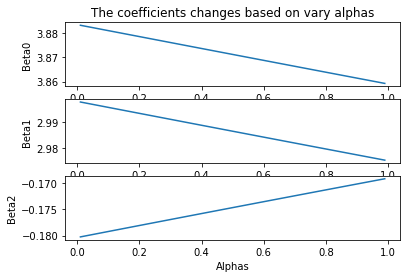

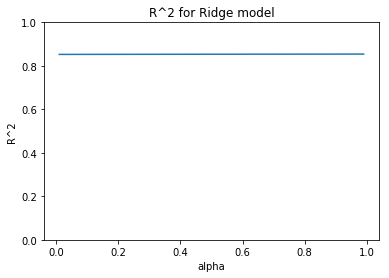

In [33]:
from sklearn.linear_model import Ridge

alphas = np.linspace(0.01,0.99,50)
R2 = np.array([])
beta = np.array([])

for i in alphas:
    clf = Ridge(alpha=i)
    clf.fit(x_scaled_train,y_scaled_train)
    beta = np.append(beta, clf.coef_)
    
    y_pred = clf.predict(x_scaled_test)
    R2 = np.append(R2, r2_score(y_scaled_test, y_pred))


beta = beta.reshape(50,3)

plt.subplot(3,1,1)
plt.plot(alphas, beta[:,0])
plt.ylabel('Beta0')
plt.title('The coefficients changes based on vary alphas')
plt.subplot(3,1,2)
plt.plot(alphas, beta[:, 1])
plt.ylabel('Beta1')
plt.subplot(3,1,3)
plt.plot(alphas, beta[:, 2])
plt.xlabel('Alphas')
plt.ylabel('Beta2')

plt.figure()
plt.plot(alphas, R2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim((0,1))
plt.title('R^2 for Ridge model')


**[Solution]:** As vary $\alpha$ changes, the coefficients are not changing very much so that the $R^2$ is almost same. `Lasso` generally leads to some coefficients being dropped out entirely; For `Ridge`, it allows for a more mixed weighting of the coefficients. However, in this `Ridge` case, as the coefficient becomes smaller its contribution to minimizing the error also becomes smaller, so the coefficient goes to zero.

**[5 points]** Did we need to rescale in part a)? Why would our solution not make sense otherwise?

**[Solution]:** Yes, we need to resacle the data first because regularized regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. Therefore, the rescaling is preventing regularized regression automatically drop large scale variables.

## Problem 5:  Gradient Descent and the learning rate

**[10 points]** a) By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 20 iterations b = 0.018732058116550685, m = 0.9469402958333616, error = 818.139181340874


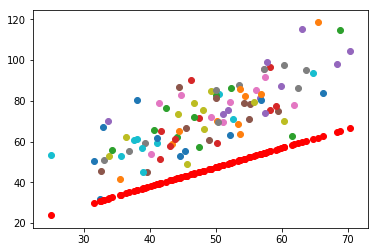

In [22]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("./data.csv", delimiter=",")
    learning_rate = 0.00001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(20)

**[Solution]:** Due to the learning rate is smaller, the iteration process is keeping searching, so it takes longer time to converge the minimum point. Following is showing the process for each 4 iteration, and find the error rate is decreasing, but after 20 steps, it does not converge to minimum error, which is 112

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


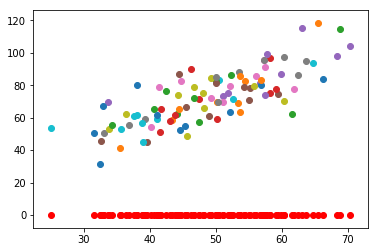

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


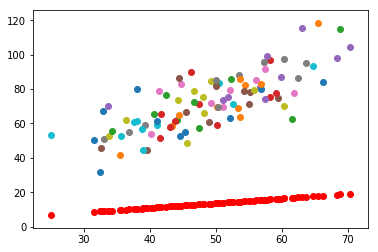

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


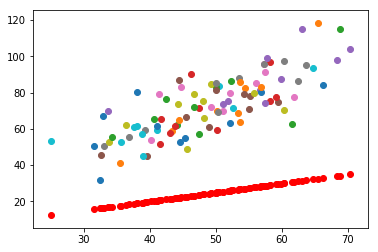

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 12 iterations b = 0.013400727229815404, m = 0.6781374997932819, error = 1711.217833386537


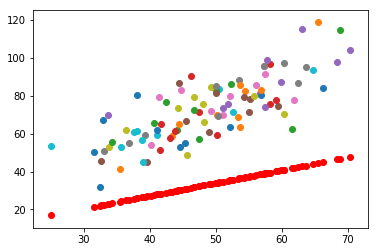

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 16 iterations b = 0.016335552734242323, m = 0.8262333367497384, error = 1174.6162025321562


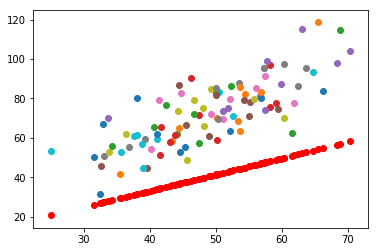

In [23]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,20,4):
   run(num)
   plt.show()


b) **[10 points]** Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

**[Solution]:** Choose `learning rate` is 0.00009, and start initial seting $y = 0$. Due to large learning rate, the error is decreasing very faster. After 5 steps, the processing is converged to minimum error. On the other hand, when the `learnign rate` is 0.00001, the error curve is smoothly drop, and after 30 steps, it reaches the minimum error. 

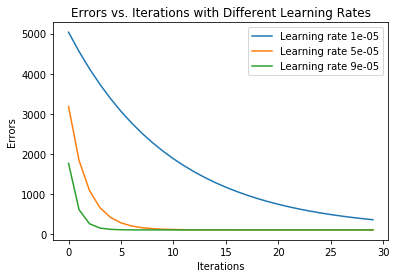

In [24]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    error = np.array([])
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        error = np.append(error, compute_error_for_line_given_points(b, m, points))
    return [b, m, error]

def run(num_iterations, learning_rate):
    points = genfromtxt("./data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    compute_error_for_line_given_points(initial_b, initial_m, points)
    [b, m, error] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    compute_error_for_line_given_points(b, m, points)
    return(error, learning_rate)

e1, rate1 = run(30, 0.00001)
e2, rate2 = run(30, 0.00005)
e3, rate3 = run(30, 0.00009)

fig, ax = plt.subplots()
ax.plot(range(30), e1, label = 'Learning rate {}'.format(rate1))
ax.plot(range(30), e2, label = 'Learning rate {}'.format(rate2))
ax.plot(range(30), e3, label = 'Learning rate {}'.format(rate3))
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Errors vs. Iterations with Different Learning Rates')
ax.legend()

# Problem 6 : Computing to Problem 2 via gradient descent. 

Let 

$$ \hat F(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \frac{1}{N}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2, $$

where $(\mathbf{x}_i, y_i)$ are as in Problem 2. 


**[10 points]** a) Solve $\nabla \hat F(\beta) = 0$ for $\beta$ in terms of $\mathbf{X}$ and $\mathbf{y}$ and show that the solution is

$$ \beta = (\mathbf X^T\mathbf X)^{-1} \mathbf X \mathbf y. $$

*Hint:*
Use the product rule for inner products afer rewriting

$$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \langle \mathbf{y} - \mathbf{X} \beta, \; \mathbf{y} - \mathbf{X} \beta \rangle. $$

**[Solution]:**

$$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \langle \mathbf{Y} - \mathbf{X} \beta, \mathbf{Y} - \mathbf{X} \beta \rangle = (\mathbf{Y} - \mathbf{X}\beta )^T(\mathbf{Y} - \mathbf{X}\beta)$$

$$\nabla F(\beta) = \nabla (\mathbf{Y} - \mathbf{X}\beta)^T(\mathbf{Y} - \mathbf{X}\beta)$$

$$= \nabla(\mathbf{Y^TY} - 2\beta^T\mathbf{X^TY} + \beta^T\mathbf{X^TX}\beta) = -\mathbf{X^TY} + \mathbf{X^TX}\beta = 0$$

when $\mathbf{X^TX}$ is full rank matrix, it exists inverse matrix

$$\mathbf{X^TX}\beta = \mathbf{X^TY} \rightarrow \hat{\beta} = (\mathbf{X^TX})^{-1}\mathbf{X^TY}$$

**[5 points]** b)  What assumption did you have to make to solve for $\beta$ in in part a)? 

**[Solution]:** $\mathbf{X^TX}$ is full rank matrix

**[10 points]** c) Let $\beta_0 = (0, 0, 0)$ and $\nu =0.01$. Using your computation of $\nabla F(\beta)$ from a), write a function in Python which iterates

$$\beta_t = \beta_{t-1} - \nu \nabla \hat F(\beta_{t-1})$$ from $t=0,...,T$ for the original, unscaled variables $X,y$.  Are you having trouble with convergence? If so, consider more iterations and a much smaller learning rate. Why do you think we had to do this in this case? 

In [25]:
x = df_X.loc[:, 'TV':]
y = df_Y

beta0 = np.array([0,0,0])
v = 0.0000001

def der_F(beta):
    return(x.T.dot(x).dot(beta) - x.T.dot(y))


In [26]:
beta = der_F(beta0)
i = 1
while i < 5000:
    beta = beta - v*der_F(beta)
    if der_F(beta).equals(0):
        break;
    i += 1

print('After {} iterations, the algorithm is converged, and find beta is {}'.format(i, np.array(beta)))

# Create linear regression object
regr = LinearRegression(fit_intercept=False)
# Train the model using the training sets
regr.fit(x, y)
# The coefficients
print('Coefficients from regression: \n', regr.coef_)

After 5000 iterations, the algorithm is converged, and find beta is [0.05379306 0.22219121 0.0168364 ]
Coefficients from regression: 
 [0.05379188 0.22222731 0.01681639]


**[Solution]:** 

**[10 points]** d) Repeat part c) but for your scaled features. Do you notice that you can obtain convergence with a lower number
of iterations and higher learning rate? Explain why rescaling your features could have this impact. 

In [27]:
x = pd.DataFrame(preprocessing.scale(df_X.loc[:, 'TV':]))
y = df_Y - np.mean(df_Y)

beta0 = np.array([0,0,0])
v = 0.0001

def der_F(beta):
    return(x.T.dot(x).dot(beta) - np.dot(x.T, y))

In [28]:
beta = der_F(beta0)
i = 1
while i < 2000:
    beta = beta - v*der_F(beta)
    if der_F(beta).equals(0):
        break;
    i += 1

print('After {} iterations, the algorithm is converged, and find beta is {}'.format(i, np.array(beta)))

regr.fit(x, y)
print('Coefficients from regression: \n', regr.coef_)

After 2000 iterations, the algorithm is converged, and find beta is [ 3.91925365  2.79206274 -0.02253861]
Coefficients from regression: 
 [ 3.91925365  2.79206274 -0.02253861]


**[Solution]:** Yes, after increased learning rate, only require 2000 iterations, I got converage. Therefore, the rescaling features helps to search the minimum value. 

**[10 points]** e) Finally consider the Lasso regularized OLS. 

$$ \hat F_{\lambda}(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}, $$


Using the optimal $\lambda$ found in Problem 4, rewrite your gradient descent algorithm for this reguarlized norm. Ensure you used your scaled features. 

$Min_{\beta} F_{\lambda}(\beta) := \|\mathbf{Y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}$

* Case 1: when $\beta > 0, \nabla \hat F_{\lambda}(\beta) = \mathbf{X^TX}\beta - \mathbf{X^TY} + \lambda$

* Case 2: when $\beta < 0, \nabla \hat F_{\lambda}(\beta) = \mathbf{X^TX}\beta - \mathbf{X^TY} - \lambda$

Therefore, $\beta_t = \beta_{t-1} - \nu \nabla \hat F(\beta_{t-1})$ from $t=0,...,T$, and the optimal $\lambda = 0.25$ from Problem 4 

In [29]:
x = pd.DataFrame(preprocessing.scale(df_X.loc[:, 'TV':]))
y = df_Y - np.mean(df_Y)

beta = np.array([0,0,0])
v = 0.00001

def der_F(beta):
    beta_new = np.array([])

    for i in beta:
        if i > 0:
            beta_new = np.append(beta_new, 1)
        else:
            beta_new = np.append(beta_new, -1)

    return(x.T.dot(x).dot(beta) - np.dot(x.T, y) + 0.25*beta_new)

i = 1
while i < 10000:
    beta = beta - v*der_F(beta)
    i += 1

print(i)
beta

10000


0    3.917994
1    2.790174
2   -0.020547
dtype: float64

**[10 points]** f) Using the starter code below, show what happens to the coefficients you obtain from gradient descent as `corr` increases from `0` to `0.97`. Explain based on what
you know about how stability relates to correlation.

Text(0,0.5,'Beta2')

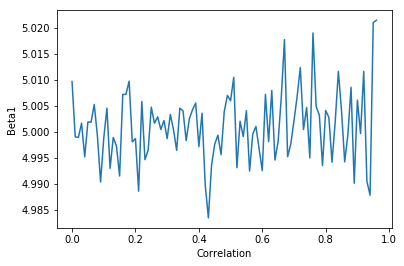

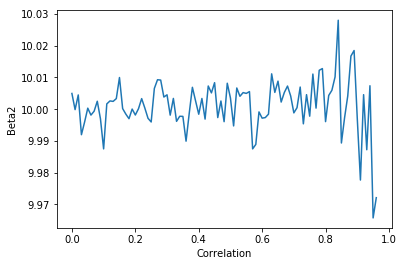

In [11]:
import numpy as np

def setup(corr):
    mean = (0,0)
    cov = [[1, corr],[corr,1 ]]
    X = np.random.multivariate_normal(mean, cov, 10000)
    y = 5*X[:,0] + 10*X[:,1] + np.random.normal(0,0.5,10000)
    return(X, y)

def grad(X, y, beta):
    return(X.T.dot(X).dot(beta) - np.dot(X.T, y))

def gradflow(corr, beta0, nu=0.00001):
    X,y = setup(corr)
    i = 0
    beta = beta0 - nu*grad(X, y, beta0)
    while i < 10000:
        beta = beta - nu*grad(X, y, beta)
        i += 1
    return(beta) 

beta1 = np.array([])
beta2 = np.array([])
for i in np.arange(0,0.97,0.01):
    beta1 = np.append(beta1, gradflow(i,[3,3])[0])
    beta2 = np.append(beta2, gradflow(i,[3,3])[1])

plt.figure()
plt.plot(np.arange(0,0.97,0.01), beta1)
plt.xlabel('Correlation')
plt.ylabel('Beta1')
    
plt.figure()
plt.plot(np.arange(0,0.97,0.01), beta2)
plt.xlabel('Correlation')
plt.ylabel('Beta2')

**[Solution]:** Since the correlation is increasing, the coefficients are getting unstable, which is high variance of beta, because higher correlation causes harder to find unique gradient solutions.